### Tugas Besar Probabilitas dan Statistika : Pengolahan Data
***
```
Disusun oleh
Nama    : Natasya Vercelly Harijadi
NIM     : 18221119
Kelas   : 01 - STI
```

In [1307]:
# import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [1308]:
# import dataset
data = pd.read_excel('18221119.xlsx')
data.head()

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
0,Wanita,48.0,D3,Wiraswasta,Rp 2 juta – Rp 5 juta,Tangerang Selatan,400%,Ya,Delivery Makanan,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,NaN,NaN
1,Wanita,19.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,1000%,Sama saja,Berbelanja online,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pria,18.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Bogor,500%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN
3,Wanita,20.0,SMA,Pelajar / Mahasiswa,Rp 2 juta – Rp 5 juta,Surabaya,NaN,Ya,Akses media sosial,NaN,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,Jumlah barang yang diterima kurang,NaN,NaN
4,Pria,19.0,S1,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,NaN,Tidak,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 150 entries, Jenis Kelamin to keluhan_belanja_online_6
dtypes: float64(1), object(149)
memory usage: 351.7+ KB


In [1310]:
# identifikasi quartil 1, quartil 3, dan IQR untuk identifikasi outlier
info = data['Usia'].describe()

Q1 = info['25%']
Q3 = info['75%']

IQR = Q3 - Q1
Q1, Q3, IQR

(19.0, 41.5, 22.5)

In [1311]:
# identifikasi range outlier
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(f"Range outlier: < {lower_bound}, > {upper_bound}")

Range outlier: < -14.75, > 75.25


In [1312]:
# filtering data outlier
data_outlier = data[(data['Usia'] < lower_bound) | (data['Usia'] > upper_bound)]
data_outlier

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
99,Pria,38231084.0,SMA,Karyawan Swasta,Rp 2 juta – Rp 5 juta,Jakarta,NaN,Sama saja,Streaming video/ film,NaN,...,NaN,NaN,NaN,NaN,NaN,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN


In [1313]:
# menghapus data yang Usianya lebih dari 100 tahun (outlier)
data = data.drop(data[data['Usia'] > 100].index)
data_outlier = data[(data['Usia'] < lower_bound) | (data['Usia'] > upper_bound)]
data_outlier

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6


In [1314]:
# identifikasi jumlah data
n = len(data)
n

299

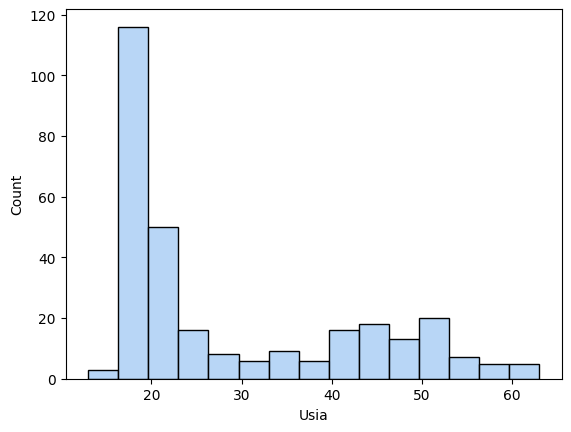

In [1315]:
# membuat histogram menggunakan seaborn
sns.histplot(data['Usia'], bins=15)
plt.show()

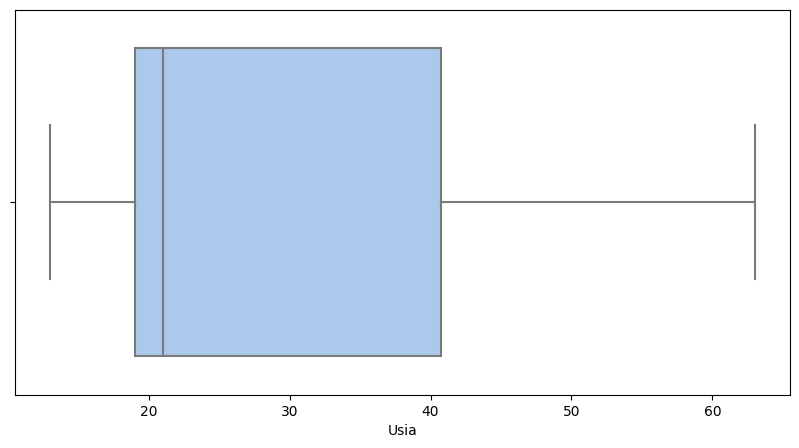

In [1316]:
# membuat boxplot menggunakan seaborn
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = 'Usia')
plt.show()

In [1317]:
pd.DataFrame(enumerate(data.columns)).to_excel('kolom.xlsx')

In [1318]:
# membuat tabel frekuensi dan proporsi jenis kelamin responden
n = len(data)
print(f"Jumlah responden: {n}")
print("Tabel Frekuensi dan Proporsi Jenis Kelamin Responden")
jenis_kelamin = pd.DataFrame(data.iloc[:,0].value_counts()).reset_index()
jenis_kelamin['Proporsi'] = jenis_kelamin['Jenis Kelamin'] / n
jenis_kelamin.columns = ['Jenis Kelamin', 'Frekuensi', 'Proporsi']
jenis_kelamin


Jumlah responden: 299
Tabel Frekuensi dan Proporsi Jenis Kelamin Responden


,Jenis Kelamin,Frekuensi,Proporsi
0,Wanita,174,0.581940
1,Pria,124,0.414716


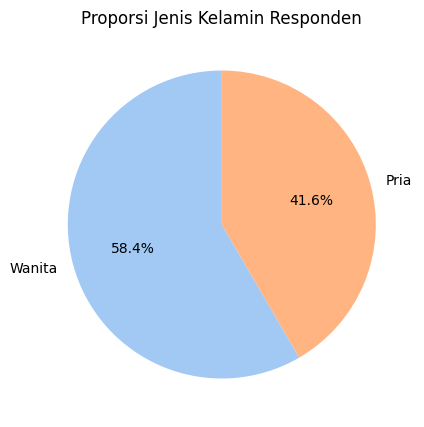

In [1319]:
# membuat pie chart untuk menampilkan proporsi jenis kelamin responden
plt.figure(figsize=(10, 5))
sns.set_palette('pastel')
plt.pie(jenis_kelamin['Proporsi'], labels=jenis_kelamin['Jenis Kelamin'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Jenis Kelamin Responden')
plt.show()

In [1320]:
# membuat tabel frekuensi dan proporsi profesi responden
print(f"Jumlah responden: {n}")
print("Tabel Frekuensi dan Proporsi Pekerjaan Responden")
pekerjaan = pd.DataFrame(data.iloc[:,3].value_counts()).reset_index()
pekerjaan['Proporsi'] = pekerjaan['Pekerjaan'] / n
pekerjaan.columns = ['Pekerjaan', 'Frekuensi', 'Proporsi']
pekerjaan

Jumlah responden: 299
Tabel Frekuensi dan Proporsi Pekerjaan Responden


,Pekerjaan,Frekuensi,Proporsi
0,Pelajar / Mahasiswa,165,0.551839
1,Karyawan Swasta,70,0.234114
2,Ibu Rumah Tangga,18,0.060201
3,Pegawai Negeri,13,0.043478
4,"Profesional ( Dokter, Dosen, Pengacara, dll)",12,0.040134
5,Pengusaha,9,0.030100
6,Wiraswasta,2,0.006689
7,Accountant,1,0.003344
8,Fresh graduate,1,0.003344
9,Honorer Pemda,1,0.003344


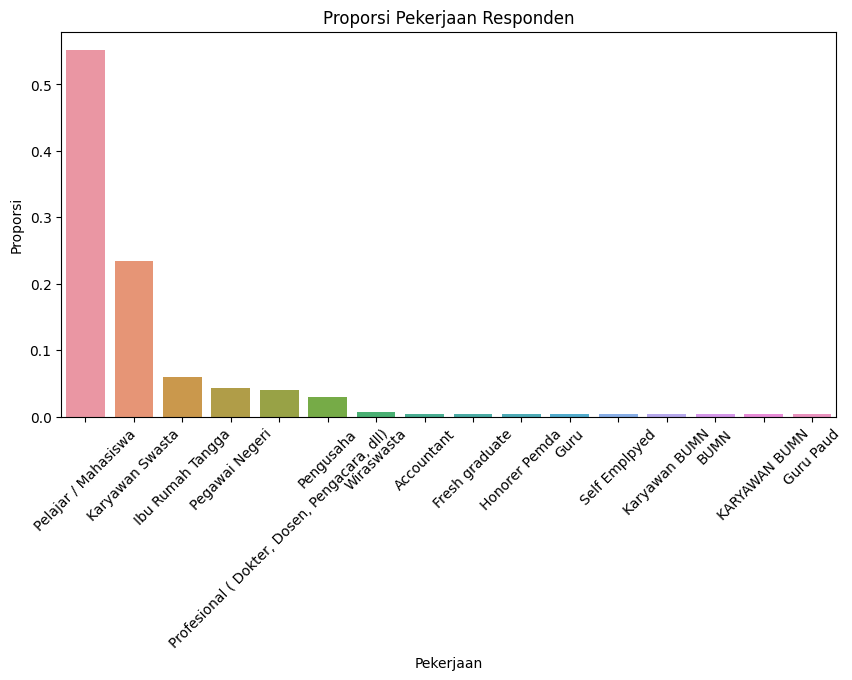

In [1321]:
# membuat bar chart untuk menampilkan proporsi profesi responden
plt.figure(figsize=(10, 5))
sns.barplot(data=pekerjaan, x='Pekerjaan', y='Proporsi')
plt.title('Proporsi Pekerjaan Responden')
plt.xticks(rotation=45)
plt.show()

In [1322]:
# membuat tabel frekuensi dan proporsi untuk apakah aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir
n = len(data)
print(f"Jumlah responden: {n}")
print("Tabel Frekuensi dan Proporsi Aktivitas Online Responden")
online = pd.DataFrame(data.iloc[:,7].value_counts()).reset_index()
online['Proporsi'] = online['Aktivitas Online Meningkat'] / n
online.columns = ['Aktivitas Online Meningkat', 'Frekuensi', 'Proporsi']
online

Jumlah responden: 299
Tabel Frekuensi dan Proporsi Aktivitas Online Responden


,Aktivitas Online Meningkat,Frekuensi,Proporsi
0,Ya,143,0.478261
1,Sama saja,117,0.391304
2,Tidak,39,0.130435


Text(0.5, 1.0, 'Proporsi Peningkatan Aktivitas Online Responden')

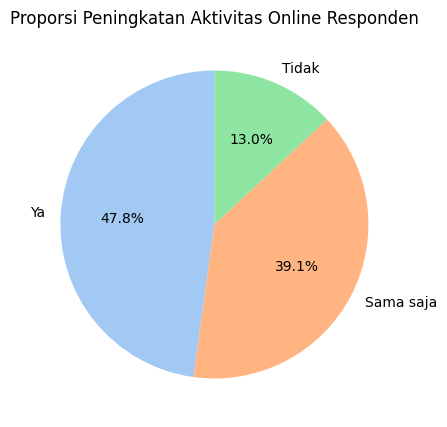

In [1323]:
# membuat pie chart untuk menampilkan proporsi apakah aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir
plt.figure(figsize=(10, 5))
sns.set_palette('pastel')
plt.pie(online['Proporsi'], labels=online['Aktivitas Online Meningkat'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Peningkatan Aktivitas Online Responden')

In [1324]:
# membuat tabel frekuensi dan proporsi pengguna 7 bank yang ada di kolom bank_1 sampai bank_7
n = len(data)
print(f"Jumlah responden: {n}")
print("Tabel Frekuensi dan Proporsi Pengguna 7 Bank")
bank = pd.DataFrame(data.iloc[:,15:21])

# konversi kolom menjadi bentuk list
a = []
for col in bank.columns:
    a += list(data[col])

# list dikonversi menjadi pandas series dan dihitung frekuensinya
bank_freq = pd.DataFrame(pd.Series(a).value_counts()).reset_index()
bank_freq.columns = ['Bank', 'Frekuensi']

# menghitung proporsi pengguna 7 bank
bank_freq['Proporsi'] = bank_freq['Frekuensi'] / n
bank_freq.columns = ['Bank', 'Frekuensi', 'Proporsi']
bank_freq

Jumlah responden: 299
Tabel Frekuensi dan Proporsi Pengguna 7 Bank


,Bank,Frekuensi,Proporsi
0,Bank BCA,168,0.561873
1,Bank Mandiri,93,0.311037
2,Bank BNI,65,0.217391
3,Bank BRI,59,0.197324
4,Bank CIMB Niaga,13,0.043478
5,Bank BTN,8,0.026756


In [1325]:
# cek confidence interval 95% untuk proporsi pengguna Bank BCA
alpha = 0.05
z_alpha_per_2 = st.norm.ppf(1 - alpha/2)
n = bank_freq['Frekuensi'].sum()
error = np.sqrt((bank_freq['Proporsi'][0] * (1 - bank_freq['Proporsi'][0])) / n)
lower_bound = bank_freq['Proporsi'][0] - z_alpha_per_2 * error
upper_bound = bank_freq['Proporsi'][0] + z_alpha_per_2 * error
print(f"Confidence interval 95% untuk proporsi pengguna Bank BCA:\n{lower_bound} < p_BCA < {upper_bound}")

Confidence interval 95% untuk proporsi pengguna Bank BCA:
0.513611036463539 < p_BCA < 0.6101347829344542


In [1326]:
# Uji hipotesis
print("Uji hipotesis untuk proporsi pengguna Bank BCA")
print("H0: p_BCA = 0.5")
print("H1: p_BCA != 0.5")
alpha = 0.05
p = float(bank_freq['Proporsi'].loc[bank_freq['Bank'] == 'Bank BCA'])
z_alpha_per_2 = st.norm.ppf(1 - alpha/2)
z = (n * p - n * 0.5) / np.sqrt(n * 0.5 * (1 - 0.5))
print(f"z = {z}")
print(f"z_alpha_per_2 = {z_alpha_per_2}")
print(f"Critical Region: z < {-z_alpha_per_2} atau z > {z_alpha_per_2}")
if (z < -z_alpha_per_2) or (z > z_alpha_per_2):
    print("Kesimpulan: H0 berhasil ditolak")
else:
    print("Kesimpulan: H0 gagal ditolak")

# mencari p_value
p_value = 2 * st.norm.cdf(-np.abs(z))
print(f"p_value = {p_value}")

Uji hipotesis untuk proporsi pengguna Bank BCA
H0: p_BCA = 0.5
H1: p_BCA != 0.5
z = 2.493409171055402
z_alpha_per_2 = 1.959963984540054
Critical Region: z < -1.959963984540054 atau z > 1.959963984540054
Kesimpulan: H0 berhasil ditolak
p_value = 0.012652295047300421


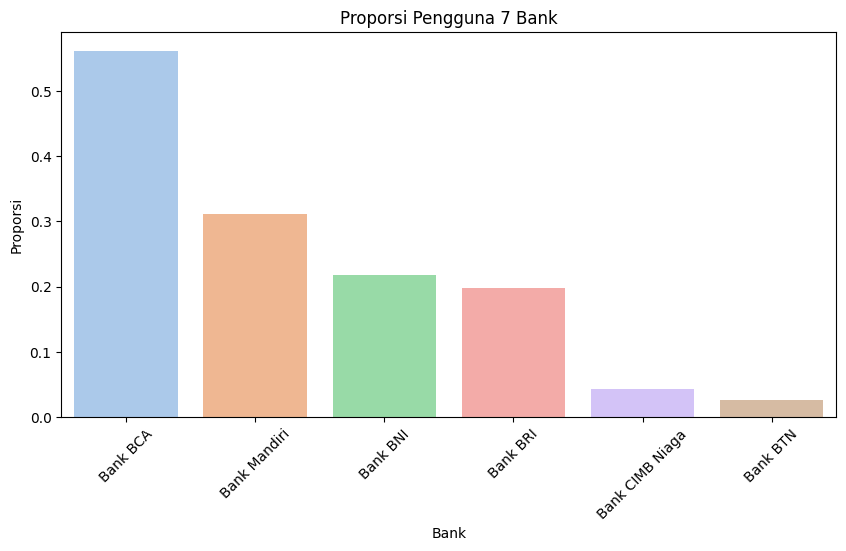

In [1327]:
# membuat bar chart untuk menampilkan proporsi pengguna 7 bank
plt.figure(figsize=(10, 5))
sns.barplot(data=bank_freq, x='Bank', y='Proporsi')
plt.title('Proporsi Pengguna 7 Bank')
plt.xticks(rotation=45)
plt.show()

In [1328]:
# membuat tabel frekuensi dan proporsi untuk preferensi channel yang dipilih responden untuk melakukan "Transfer antar bank"
n = len(data)
print(f"Jumlah responden: {n}")
print("Tabel Frekuensi dan Proporsi Preferensi Channel Transfer Antar Bank")
channel = pd.DataFrame(data.iloc[:,30].value_counts()).reset_index()
channel['Proporsi'] = channel['19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Transfer antar bank]'] / n
channel.columns = ['Channel Transfer Antar Bank', 'Frekuensi', 'Proporsi']
channel

Jumlah responden: 299
Tabel Frekuensi dan Proporsi Preferensi Channel Transfer Antar Bank


,Channel Transfer Antar Bank,Frekuensi,Proporsi
0,Mobile Banking,205,0.685619
1,Internet Banking,27,0.090301
2,ATM,19,0.063545
3,Datang ke cabang bank,3,0.010033
4,SMS Banking,1,0.003344


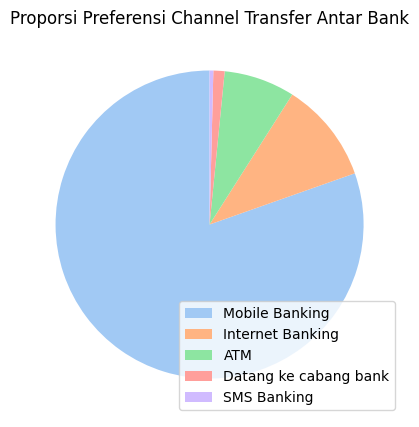

In [1329]:
# membuat pie chart untuk menampilkan proporsi preferensi channel yang dipilih responden untuk melakukan "Transfer antar bank"
plt.figure(figsize=(10, 5))
sns.set_palette('pastel')
plt.pie(channel['Proporsi'], startangle=90)
plt.legend(labels=channel['Channel Transfer Antar Bank'], loc='lower right')
plt.title('Proporsi Preferensi Channel Transfer Antar Bank')
plt.show()

In [1330]:
# membuat tabel frekuensi dan proporsi pengguna 7 e-money
n = len(data)
print(f"Jumlah responden: {n}")
print("Tabel Frekuensi dan Proporsi Pengguna 7 e-Money")
emoney = pd.DataFrame(data.iloc[:,37:43])

# konversi kolom menjadi bentuk list
b = []
for col in emoney.columns:
    b += list(data[col])

# list dikonversi menjadi pandas series dan dihitung frekuensinya
emoney_freq = pd.DataFrame(pd.Series(b).value_counts()).reset_index()
emoney_freq.columns = ['e-Money', 'Frekuensi']

# menghitung proporsi pengguna 7 e-money
emoney_freq['Proporsi'] = emoney_freq['Frekuensi'] / n
emoney_freq.columns = ['e-Money', 'Frekuensi', 'Proporsi']
emoney_freq

Jumlah responden: 299
Tabel Frekuensi dan Proporsi Pengguna 7 e-Money


,e-Money,Frekuensi,Proporsi
0,GoPay,228,0.762542
1,ShopeePay,185,0.618729
2,OVO,167,0.558528
3,Dana,127,0.424749
4,eMoney Mandiri,89,0.297659
5,Flazz BCA,77,0.257525


In [1331]:
p_gopay = float(emoney_freq["Proporsi"].loc[emoney_freq["e-Money"] == "GoPay"])
p_ovo = float(emoney_freq["Proporsi"].loc[emoney_freq["e-Money"] == "OVO"])
n = emoney_freq["Frekuensi"].sum()
alpha = 0.05
z_alpha_per_2 = st.norm.ppf(1 - alpha/2, loc=0, scale=1)
error = z_alpha_per_2 * np.sqrt(p_gopay*(1-p_gopay)/n + p_ovo*(1-p_ovo)/n)

lower_bound = p_gopay - p_ovo - error
upper_bound = p_gopay - p_ovo + error

print(f"Confidence interval 95% untuk selisih proporsi pengguna GoPay dan OVO:\n{lower_bound} < p_GoPay - p_OVO < {upper_bound}")

Confidence interval 95% untuk selisih proporsi pengguna GoPay dan OVO:
0.16063400301726966 < p_GoPay - p_OVO < 0.24739275283557333


In [1332]:
print("Uji hipotesis untuk selisih proporsi pengguna GoPay dan OVO")
print("H0: p_GoPay - p_OVO = 0")
print("H1: p_GoPay > p_OVO")
alpha = 0.05
z_alpha = st.norm.ppf(alpha)
x_gopay = float(emoney_freq['Frekuensi'].loc[emoney_freq['e-Money'] == 'GoPay'])
x_ovo = float(emoney_freq['Frekuensi'].loc[emoney_freq['e-Money'] == 'OVO'])
p_hat = (x_gopay + x_ovo) / (n + n)
z = (p_gopay - p_ovo) / np.sqrt(p_hat * (1 - p_hat) * (1/n + 1/n))
print(f"z = {z}")
print(f"z_alpha = {z_alpha}")
print(f"Critical Region: z > {z_alpha}")
if (z > z_alpha):
    print("Kesimpulan: H0 berhasil ditolak")
else:
    print("Kesimpulan: H0 gagal ditolak")

Uji hipotesis untuk selisih proporsi pengguna GoPay dan OVO
H0: p_GoPay - p_OVO = 0
H1: p_GoPay > p_OVO
z = 10.187527351684883
z_alpha = -1.6448536269514729
Critical Region: z > -1.6448536269514729
Kesimpulan: H0 berhasil ditolak


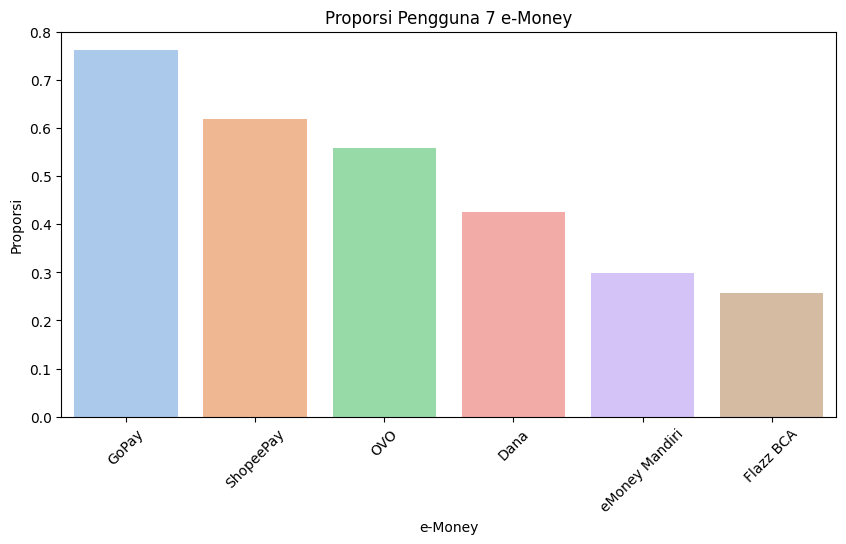

In [1333]:
# membuat bar chart untuk menampilkan proporsi pengguna 7 e-money
plt.figure(figsize=(10, 5))
sns.barplot(data=emoney_freq, x='e-Money', y='Proporsi')
plt.title('Proporsi Pengguna 7 e-Money')
plt.xticks(rotation=45)
plt.show()

In [1334]:
# membuat tabel frekuensi dan proporsi nominal yang biasa dipakai untuk top-up e-money
n = len(data)
print(f"Jumlah responden: {n}")
print("Tabel Frekuensi dan Proporsi Nominal Top-Up e-Money")
nominal = pd.DataFrame(data.iloc[:,70].value_counts()).reset_index()
nominal['Proporsi'] = nominal['39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?'] / n
nominal.columns = ['Nominal Top-Up e-Money', 'Frekuensi', 'Proporsi']
nominal


Jumlah responden: 299
Tabel Frekuensi dan Proporsi Nominal Top-Up e-Money


,Nominal Top-Up e-Money,Frekuensi,Proporsi
0,Rp 50.001 – Rp 100.000,80,0.267559
1,Rp 150.001 – Rp 300.000,60,0.200669
2,> Rp 300.000,58,0.193980
3,Rp 100.001 – Rp 150.000,48,0.160535
4,"Rp 25.000 – Rp 50.000,-",30,0.100334
5,"< Rp 25.000,-",5,0.016722


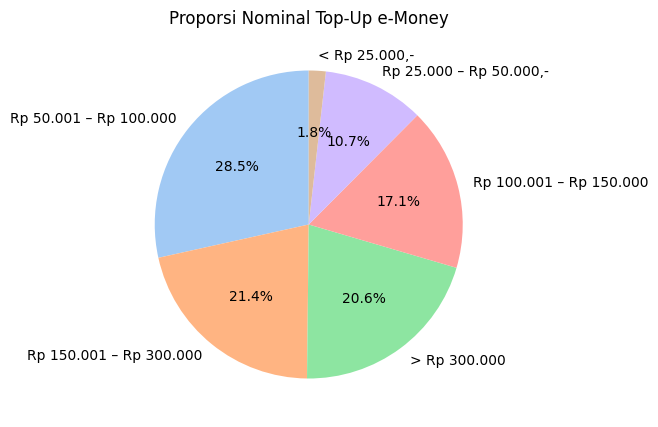

In [1335]:
# membuat pie chart untuk menampilkan proporsi nominal yang biasa dipakai untuk top-up e-money
plt.figure(figsize=(10, 5))
sns.set_palette('pastel')
plt.pie(nominal['Proporsi'], labels=nominal['Nominal Top-Up e-Money'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Nominal Top-Up e-Money')
plt.show()

In [1336]:
# membuat tabel frekuensi dan proporsi pengguna 7 e-commerce
n = len(data)
print(f"Jumlah responden: {n}")
print("Tabel Frekuensi dan Proporsi Pengguna 7 e-Commerce")
ecommerce = pd.DataFrame(data.iloc[:,116:122])

# konversi kolom menjadi bentuk list
c = []
for col in ecommerce.columns:
    c += list(data[col])

# list dikonversi menjadi pandas series dan dihitung frekuensinya
ecommerce_freq = pd.DataFrame(pd.Series(c).value_counts()).reset_index()
ecommerce_freq.columns = ['e-Commerce', 'Frekuensi']

# menghitung proporsi pengguna 7 e-commerce
ecommerce_freq['Proporsi'] = ecommerce_freq['Frekuensi'] / n
ecommerce_freq.columns = ['e-Commerce', 'Frekuensi', 'Proporsi']
ecommerce_freq

Jumlah responden: 299
Tabel Frekuensi dan Proporsi Pengguna 7 e-Commerce


,e-Commerce,Frekuensi,Proporsi
0,Shopee,243,0.812709
1,Gojek (GoFood,212,0.709030
2,Tokopedia,184,0.615385
3,Grab (GrabFood,126,0.421405
4,Traveloka,46,0.153846
5,Lazada,34,0.113712


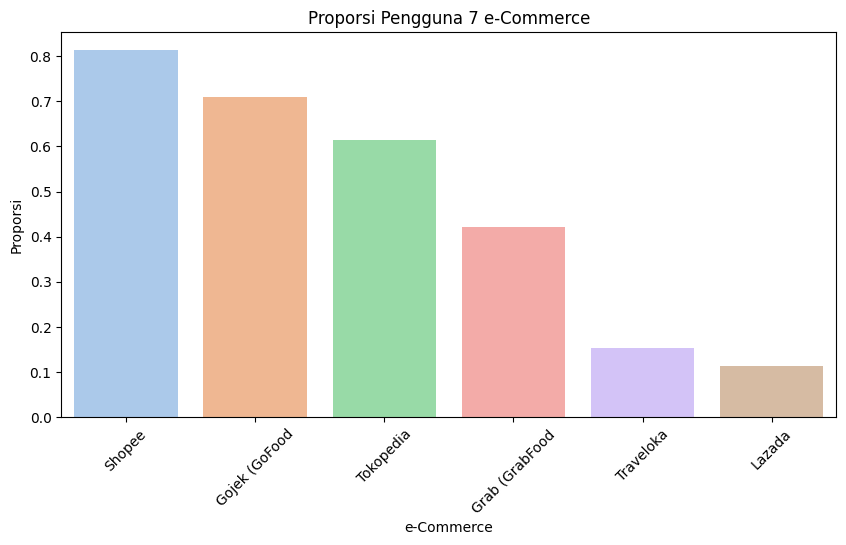

In [1337]:
# membuat bar chart untuk menampilkan proporsi pengguna 7 e-commerce
plt.figure(figsize=(10, 5))
sns.barplot(data=ecommerce_freq, x='e-Commerce', y='Proporsi')
plt.title('Proporsi Pengguna 7 e-Commerce')
plt.xticks(rotation=45)
plt.show()

In [1338]:
# membuat tabel frekuensi dan proporsi untuk responden yang prefer beli handphone online atau offline
n = len(data)
print(f"Jumlah responden: {n}")
print("Tabel Frekuensi dan Proporsi Preferensi Beli Handphone Online atau Offline")
handphone = pd.DataFrame(data.iloc[:,99].value_counts()).reset_index()
handphone['Proporsi'] = handphone['47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [handphone]'] / n
handphone.columns = ['Preferensi Beli Handphone', 'Frekuensi', 'Proporsi']
handphone


Jumlah responden: 299
Tabel Frekuensi dan Proporsi Preferensi Beli Handphone Online atau Offline


,Preferensi Beli Handphone,Frekuensi,Proporsi
0,offline/ langsung datang ke toko fisik,201,0.672241
1,online,61,0.204013


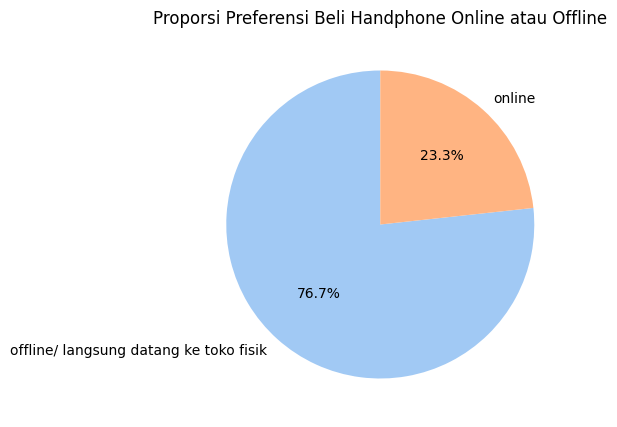

In [1339]:
# membuat pie chart untuk menampilkan proporsi preferensi beli handphone online atau offline
plt.figure(figsize=(10, 5))
sns.set_palette('pastel')
plt.pie(handphone['Proporsi'], labels=handphone['Preferensi Beli Handphone'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Preferensi Beli Handphone Online atau Offline')
plt.show()

In [1340]:
# membuat tabel frekuensi dan proporsi untuk tempat beli makanan online pilihan responden
n = len(data)
print(f"Jumlah responden: {n}")
print("Tabel Frekuensi dan Proporsi Tempat Beli Makanan Online")
makanan = pd.DataFrame(data.iloc[:,128].value_counts()).reset_index()
makanan['Proporsi'] = makanan['50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?'] / n
makanan.columns = ['Tempat Beli Makanan Online', 'Frekuensi', 'Proporsi']
makanan

Jumlah responden: 299
Tabel Frekuensi dan Proporsi Tempat Beli Makanan Online


,Tempat Beli Makanan Online,Frekuensi,Proporsi
0,GoFood,133,0.444816
1,ShopeeFood,88,0.294314
2,GrabFood,61,0.204013
3,Tidak pernah menggunakan layanan Food Delivery,11,0.036789
4,Tokopedia,1,0.003344
5,Maxim food,1,0.003344


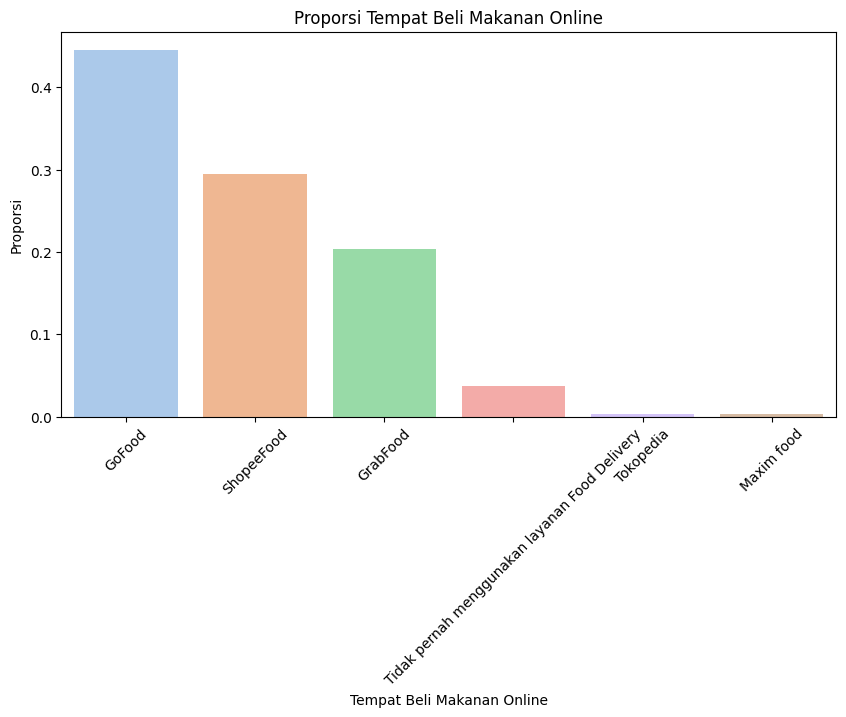

In [1341]:
# membuat bar chart untuk menampilkan proporsi tempat beli makanan online pilihan responden
plt.figure(figsize=(10, 5))
sns.barplot(data=makanan, x='Tempat Beli Makanan Online', y='Proporsi')
plt.title('Proporsi Tempat Beli Makanan Online')
plt.xticks(rotation=45)
plt.show()

In [1342]:
# Membuat tabel baru untuk one way ANOVA Test
makanan = pd.DataFrame(data.iloc[:,[1,128]])
makanan.columns = ['Usia', 'Tempat_Beli_Makanan_Online']
makanan

,Usia,Tempat_Beli_Makanan_Online
0,48.0,GoFood
1,19.0,GoFood
2,18.0,ShopeeFood
3,20.0,ShopeeFood
4,19.0,ShopeeFood
...,...,...
295,50.0,GrabFood
296,19.0,GoFood
297,40.0,ShopeeFood
298,21.0,ShopeeFood


In [1343]:
print("One Way ANOVA Test")
model = ols('Usia ~ C(Tempat_Beli_Makanan_Online)', data=makanan).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
alpha = 0.05
f_alpha = st.f.ppf(q=1-alpha, dfn=3, dfd=n-3)
anova_table

One Way ANOVA Test


,df,sum_sq,mean_sq,F,PR(>F)
C(Tempat_Beli_Makanan_Online),5.0,4609.054807,921.810961,5.686855,0.000051
Residual,288.0,46683.370363,162.095036,NaN,NaN


In [1344]:
print('Kesimpulan: ',end="")
if anova_table['F'][0] > f_alpha:
    print('H0 ditolak, ada perbedaan usia antar tempat beli makanan online')
else:
    print('H0 diterima, tidak ada perbedaan usia antar tempat beli makanan online')

Kesimpulan: H0 ditolak, ada perbedaan usia antar tempat beli makanan online


### Insights/Pelajaran yang didapatkan dari hasil pengolahan data responden
- Mayoritas responden merupakan nasabah Bank BCA dan aktif menggunakan fitur Mobile Banking untuk transaksi
- Hampir seluruh orang pernah membeli makan secara online. Mayoritas menggunakan GoFood untuk memesan makanan secara online
- Proporsi orang yang menggunakan GoPay lebih banyak daripada proporsi pengguna GoFood, artinya sebagian orang mungkin:
    - Tidak menggunakan GoPay untuk membayar GoFood
    - Menggunakan GoPay untuk membayar hal lain
- Lebih dari 50% responden merupakan pelajar/mahasiswa tetapi nominal top-up e-money cenderung tinggi (>Rp50.000)
- Lebih dari 80% responden menggunakan Shopee tetapi hanya ~60% responden yang melakukan top-up paling sering ke ShopeePay, artinya sebagian besar pengguna Shopee menggunakan ShopeePay sebagai alat pembayaran.